In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df =pd.read_csv('adult_GPR_A1.csv')

attributes = ['age',
              'workclass',
              'fnlwgt',
              'education',
              'education_num',
              'marital_status',
              'occupation',
              'relationship'
              'race',
              'sex',
              'capital_gain',
              'capital_loss',
              'hours_per_week'
              'native_country',
              'income'];

attr_cat=['workclass',
          'education',
          'marital_status',
          'occupation',
          'relationship',
          'race',
          'sex',
          'native_country',
          'income'];

In [3]:
print (len(df))
print (df.dtypes)

#removed rows with null values

df = df[df.workclass != '?']
df = df[df.education != '?']
df = df[df.marital_status != '?']
df = df[df.occupation != '?']
df = df[df.relationship != '?']
df = df[df.race != '?']
df = df[df.sex != '?']
df = df[df.native_country != '?']
df = df[df.income != '?']
print (len(df));

32561
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
30162


In [4]:
#mapping values
mapping = {'<=50K':0,'>50K':1,'Female':0,'Male':1};
df.replace({'income': mapping,'native_country':mapping,'sex':mapping}, inplace = True)
map_workclass = {'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6};
df.replace({'workclass':map_workclass},inplace=True);
map_maritalstatus={'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5}
df.replace({'marital_status':map_maritalstatus},inplace=True);
map_race={'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4}
df.replace({'race':map_race},inplace=True);
map_relationship={'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1};
df.replace({'relationship':map_relationship},inplace=True);

In [5]:
#dropping columns

X = df.drop('education', axis=1)
X = X.drop('occupation', axis=1)
X = X.drop('native_country', axis=1)
print (X.head())


#train test split
X=X[:1000]
y = X.income        
X = X.drop('income', axis=1)
X_train, X_test, Y_train, y_test = train_test_split(X, y,test_size=0.2)
xl=len(X_train)
xtl=len(X_test)
yl=len(Y_train)
ytl=len(y_test)

   age  workclass  fnlwgt  education_num  marital_status  relationship  race  \
1   82          0  132870              9               0             0     0   
3   54          0  140359              4               1             0     0   
4   41          0  264663             10               2             0     0   
5   34          0  216864              9               1             0     0   
6   38          0  150601              6               2             0     0   

   sex  capital_gain  capital_loss  hours_per_week  income  
1    0             0          4356              18       0  
3    0             0          3900              40       0  
4    0             0          3900              40       0  
5    0             0          3770              45       0  
6    1             0          3770              40       0  


In [6]:
print ("len xtrain =",xl," xtest=",xtl);

len xtrain = 800  xtest= 200


In [7]:
#12 attributes
D=11
n=xl #train inputs
nn=xtl #test

att1 = ['age',
              'workclass',
              'fnlwgt',
              'education_num',
              'marital_status',
              'relationship'
              'race',
              'sex',
              'capital_gain',
              'capital_loss',
              'hours_per_week'];

input = X_train.iloc[:,:];
test = X_test.iloc[:,:];


    

In [8]:
def gpr(x_train, y_train, x_test):
    n=len(x_train)
    nn=len(x_test)
    
    Q = np.zeros((n,n));
   
    for d in range(0,D):
        m1 = np.tile(x_train.values[:,d].reshape(-1,1),(1,n))
        m2 = np.tile(x_train.values[:,d].transpose(),(n,1))
        temp = m1-m2;
        Q = Q + np.square(temp);
        
    a = np.zeros((n,nn));

    for d in range(0,D):
        temp = x_train.values[:,d]
        temp=temp.reshape((-1,1))
        m1 = np.tile(temp,(1,nn))
        m2 = np.tile(x_test.values[:,d].reshape(-1,1).transpose(),(n,1))
        temp = m1-m2;
        a = a + np.square(temp);
        
    at = a.transpose();
    q_inv=np.linalg.inv(Q);
    y_train=Y_train.values.reshape(-1,1);
    m1 = np.matmul(q_inv,y_train);
    mu = np.matmul(at,m1);
    return mu;

In [9]:
x_test_svm=gpr(X_train,Y_train,X_test)
print (x_test_svm.shape)

(200, 1)


In [10]:
x_train_svm=gpr(X_train,Y_train,X_train)
print (x_train_svm.shape)

(800, 1)


In [11]:
y_train=Y_train.values.reshape(-1,1);
print (y_train)
print (y_test)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]


In [12]:
clf = svm.SVC();
clf.fit(x_train_svm, y_train);
y_pred = clf.predict(x_test_svm);
print (y_test.shape)
print (y_pred.shape)
y_test=y_test.tolist()
y_pred=y_pred.tolist()

(200,)
(200,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


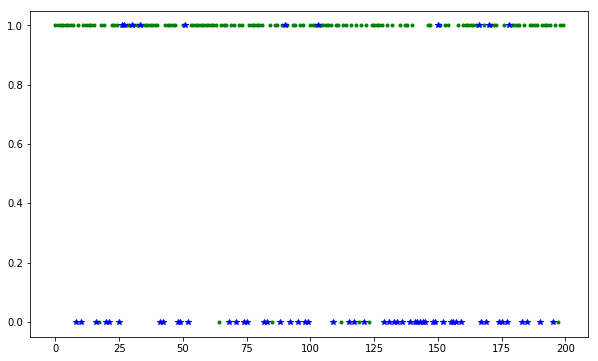

Accuracy: 68.0
[[  7  53]
 [ 11 129]]


In [14]:
#y_test=y_test.tolist()
#y_pred=y_pred.tolist()
xc = []
xinc=[]
yc=[]
yinc=[]
for x in range(0,len(y_test)):
    if(y_test[x]==y_pred[x]):
        yc.append(y_test[x])
        xc.append(x)
    else:
        if(x>165 || x<152)
        yinc.append(y_test[x])
        xinc.append(x)
plt.figure(figsize=(10,6))
plt.plot(xc, yc, 'go',markersize=3)
plt.plot(xinc,yinc,'b*',markersize=6)
plt.show()
#Accuracy
print ("Accuracy:" , (100*accuracy_score(y_test, y_pred)))
print (confusion_matrix(y_test, y_pred))

In [15]:
print (X.head)

<bound method NDFrame.head of       age  workclass  fnlwgt  education_num  marital_status  relationship  \
1      82          0  132870              9               0             0   
3      54          0  140359              4               1             0   
4      41          0  264663             10               2             0   
5      34          0  216864              9               1             0   
6      38          0  150601              6               2             0   
7      74          1   88638             16               3             0   
8      68          2  422013              9               1             0   
10     45          0  172274             16               1             0   
11     38          3  164526             15               3             0   
12     52          0  129177             13               0             0   
13     32          0  136204             14               2             0   
15     46          0   45363             15   